In [1]:
%matplotlib inline
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import time

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-htgjo3xt because the default path (/home/tsr42/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Mean Plots

In [2]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
gray = (167/255, 168/255, 170/255, 1)
red = (179/255, 27/255, 27/255, 1)
blue = (0,47/255, 108/255,1)
markersize=10

In [3]:
resultsMustBeAfter = time.struct_time((2021, 5, 25, 0, 0, 0, 0, 0, 0))
tResultsMustBeAfter = time.mktime(resultsMustBeAfter)
print(tResultsMustBeAfter)

1621918800.0


In [4]:
def plotWithColor(evaluation_filepaths, xval=0, color="black", desired_locality=0.1):
    data=[]
    for ind, filename in enumerate(evaluation_filepaths):
        tFile = os.path.getmtime(filename)
        if (tFile < tResultsMustBeAfter):
            continue
        evaluation_results = json.loads(
                open(filename, "r").read())
        locality = float(evaluation_results["evaluation_config.local_sample_factors.locality_proportion"])
        # I concerned.
        if locality != desired_locality:
            continue
        met_samps = evaluation_results[metvalname]
        data.append(np.mean(met_samps))
    vplot = plt.violinplot(np.array(data), [xval], points=20, widths=0.3, showextrema=True, showmedians=True)
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = vplot[partname]
        vp.set_edgecolor(color)
        vp.set_linewidth(5)
        vp.set_alpha(1)
    for name in ["bodies"]:
        for pc in vplot[name]:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
            pc.set_alpha(0.5)
    return data # so we can run t-tests

In [5]:
combinedOutputs = "combinedOutputsThreeDots/combinedOutputs"

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


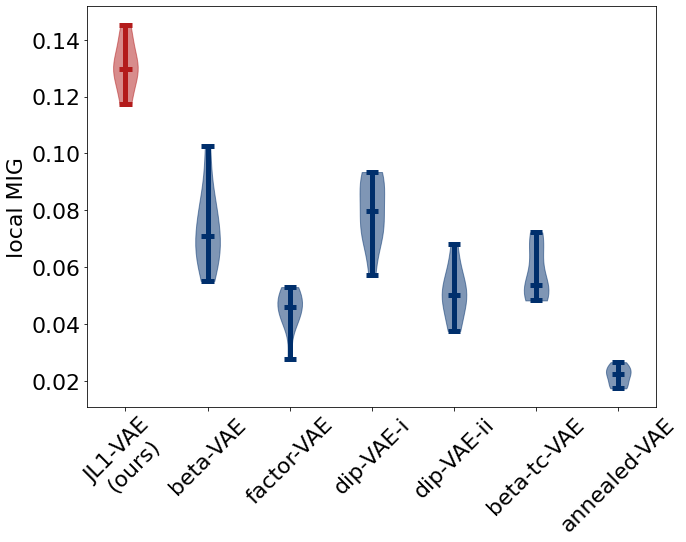

'beta_vae'
Ttest_indResult(statistic=10.930309987738424, pvalue=2.2339031176765768e-09)
'factor_vae'
Ttest_indResult(statistic=23.383976592046707, pvalue=6.381524435956264e-15)
'dip_vae_i'
Ttest_indResult(statistic=10.994716106263601, pvalue=2.036217593383226e-09)
'dip_vae_ii'
Ttest_indResult(statistic=19.60725144266117, pvalue=1.3561264649631983e-13)
'beta_tc_vae'
Ttest_indResult(statistic=17.892096194397688, pvalue=6.526390416205413e-13)
'annealed_vae'
Ttest_indResult(statistic=34.4716346315957, pvalue=3.5695813943493246e-17)


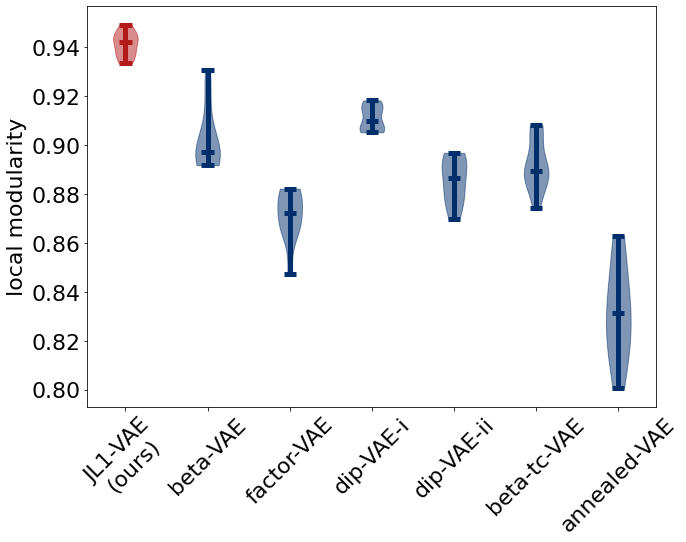

'beta_vae'
Ttest_indResult(statistic=185.97956746644357, pvalue=5.169178140380629e-31)
'factor_vae'
Ttest_indResult(statistic=315.4374233304841, pvalue=3.8425365652872964e-35)
'dip_vae_i'
Ttest_indResult(statistic=214.3548124914629, pvalue=4.016751172075735e-32)
'dip_vae_ii'
Ttest_indResult(statistic=265.38682418586285, pvalue=8.608951684801827e-34)
'beta_tc_vae'
Ttest_indResult(statistic=264.53203225343685, pvalue=9.12354736756874e-34)
'annealed_vae'
Ttest_indResult(statistic=462.21380933288503, pvalue=2.732376646761966e-36)
'beta_vae'
Ttest_indResult(statistic=8.746336046384544, pvalue=6.726857671236882e-08)
'factor_vae'
Ttest_indResult(statistic=18.846916682503693, pvalue=2.6781020658481005e-13)
'dip_vae_i'
Ttest_indResult(statistic=13.233688056793703, pvalue=1.0282708469965062e-10)
'dip_vae_ii'
Ttest_indResult(statistic=16.441076989837576, pvalue=2.751484336962532e-12)
'beta_tc_vae'
Ttest_indResult(statistic=12.78474037305503, pvalue=1.8082028940484505e-10)
'annealed_vae'
Ttest_ind

In [6]:
dataDicts = []
for metric, metvalname in [("local_mig","evaluation_results.local_discrete_migs_samples"), 
               ("local_modularity","evaluation_results.local_modularity_scores_samples")]:
    f = plt.figure(figsize=(10,8))
    ticklabels = ["JL1-VAE\n(ours)"]
    for minx, modgrp in enumerate([10,40,70,100,130,160]): # we already showed beta-vae in the previous slide
        evaluation_filepaths = glob.glob(f"../trainedStandardModels/model{modgrp}?_on3dots/*/metrics/{metric}*/results/aggregate/evaluation.json")
        disentangVals = plotWithColor(evaluation_filepaths, xval=minx+1, color=blue)
        methodname = json.loads(
                open(evaluation_filepaths[0], "r").read())['train_config.model.name']
        ticklabels.append(methodname.replace("'","").replace("_","-").replace("vae","VAE"))
        dataDicts.append((methodname, disentangVals))
    
    evaluation_filepaths = glob.glob(f"../{combinedOutputs}/threeDots/*ica0_1000_lat10*/*/metrics/{metric}*/results/aggregate/evaluation.json")
    #print(evaluation_filepaths)
    ourDisentangVals = plotWithColor(evaluation_filepaths, color=red)
    
    plt.ylabel(metric.replace("_"," ").replace("mig","MIG"))
    plt.xticks(range(len(ticklabels)), ticklabels, rotation=45)
    plt.tight_layout()
    f.savefig(f"threeDots_{metric}_compareToStandard.png")
    plt.show();plt.close()
    
    import scipy.stats
    for methodname, disentangVals in dataDicts:
        print(methodname)
        print(scipy.stats.ttest_ind(ourDisentangVals, disentangVals))